In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
FULL_TRAIN_FILE = "TrainOnMe-2.csv"
EVALUATE_FILE = "EvaluateOnMe-2.csv"

def readData():
    df = pd.read_csv(FULL_TRAIN_FILE, index_col=0)
    # print(df.info())
    # print(df["x6"].describe())
    # print(df["x6"].values)
    df = df[pd.to_numeric(df["x6"], errors="coerce").notnull()]
    df["x6"] = pd.to_numeric(df["x6"])
    df = df.dropna(axis=0)
    df = df.drop_duplicates()
    df["x12"] = df["x12"].astype("bool")
    # print(df.describe(include="all"))
    print(df.info())
    return df

df = readData()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       995 non-null    object 
 1   x1      995 non-null    float64
 2   x2      995 non-null    float64
 3   x3      995 non-null    float64
 4   x4      995 non-null    float64
 5   x5      995 non-null    float64
 6   x6      995 non-null    float64
 7   x7      995 non-null    object 
 8   x8      995 non-null    float64
 9   x9      995 non-null    float64
 10  x10     995 non-null    float64
 11  x11     995 non-null    float64
 12  x12     995 non-null    bool   
 13  x13     995 non-null    float64
dtypes: bool(1), float64(11), object(2)
memory usage: 109.8+ KB
None


,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13
count,995.000000,995.000000,995.000000,9.950000e+02,995.000000,995.000000,995.000000,995.000000,995.000000,9.950000e+02,995.000000
mean,0.982566,0.023618,-1.030506,-9.046144e+04,10.312663,0.026528,-0.023860,0.000569,-8.678539,1.005025e+18,48.613057
std,0.949277,0.694079,3.245027,2.853192e+06,0.273211,0.706240,1.283839,1.418782,1.623066,3.170213e+19,47.005128
min,-1.738210,-2.091310,-11.985670,-9.000000e+07,9.781430,-2.115920,-5.271550,-5.259760,-14.571440,-6.000520e+00,-87.163650
25%,0.360050,-0.452630,-3.217285,-9.467225e+00,10.095195,-0.456800,-0.813975,-0.879965,-9.745025,-2.031350e+00,17.944200
50%,0.967760,0.020070,-1.164630,-9.182040e+00,10.300000,0.025270,-0.011360,0.019290,-8.648330,-1.179570e+00,47.333140
75%,1.567290,0.491455,1.174935,-8.919690e+00,10.512735,0.502410,0.779865,0.949200,-7.634435,-1.900600e-01,77.740625
max,4.006740,1.873800,8.743360,-8.292200e+00,10.992940,1.949280,4.038190,4.813840,-3.201190,1.000000e+21,197.648100


In [70]:
def cleanOutliers(data, scale):
    newData = data.copy()
    # outliers in x4, x11
    Q1 = newData.quantile(0.25)
    Q3 = newData.quantile(0.75)
    IQR = Q3 - Q1
    isInlier = ~((newData < (Q1 - scale * IQR / 2)) | (newData > (Q3 + scale * IQR / 2))).any(axis = 1)
    newData = newData[isInlier]
    return newData

roughly_cleaned_data = cleanOutliers(df, scale=8.0)
roughly_cleaned_data.describe()

C:\Users\18740\AppData\Local\Temp/ipykernel_25092/687437445.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  isInlier = ~((newData < (Q1 - scale * IQR / 2)) | (newData > (Q3 + scale * IQR / 2))).any(axis = 1)
C:\Users\18740\AppData\Local\Temp/ipykernel_25092/687437445.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  isInlier = ~((newData < (Q1 - scale * IQR / 2)) | (newData > (Q3 + scale * IQR / 2))).any(axis = 1)


,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,0.980623,0.022927,-1.030194,-9.188528,10.313007,0.025673,-0.024991,0.001618,-8.677717,-0.949767,48.516033
std,0.949241,0.694466,3.248276,0.382514,0.273208,0.706440,1.284498,1.417565,1.623237,1.744452,47.002496
min,-1.738210,-2.091310,-11.985670,-10.169910,9.781430,-2.115920,-5.271550,-5.259760,-14.571440,-6.000520,-87.163650
25%,0.358650,-0.454290,-3.218440,-9.467110,10.095650,-0.457150,-0.814180,-0.879850,-9.732810,-2.027310,17.936880
50%,0.967760,0.019310,-1.164630,-9.181560,10.300000,0.019090,-0.011360,0.019290,-8.648330,-1.179570,47.307770
75%,1.566100,0.491370,1.175040,-8.918460,10.512850,0.500350,0.778470,0.949020,-7.636030,-0.190850,77.668300
max,4.006740,1.873800,8.743360,-8.292200,10.992940,1.949280,4.038190,4.813840,-3.201190,6.794180,197.648100


In [71]:
encoded_data = roughly_cleaned_data.copy()
encoded_data["y"] = encoded_data["y"].astype("category").cat.codes
encoded_data.corr()
# correlation between x1 and x13


,y,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x12,x13
y,1.000000,-0.001350,0.004003,0.023838,-0.003809,0.070689,-0.000887,-0.019978,-0.019575,0.194031,0.090721,0.002010,-0.000539
x1,-0.001350,1.000000,0.293823,-0.298685,-0.001595,0.030807,0.290408,0.042480,-0.014453,0.042411,-0.026274,-0.204683,0.999456
x2,0.004003,0.293823,1.000000,-0.155470,-0.033130,0.026607,0.989845,0.006542,-0.005126,-0.048039,0.018189,0.035287,0.291324
x3,0.023838,-0.298685,-0.155470,1.000000,-0.035331,0.022240,-0.162938,-0.050680,-0.008359,0.011004,0.005600,0.773938,-0.267051
x4,-0.003809,-0.001595,-0.033130,-0.035331,1.000000,0.048890,-0.033730,-0.004000,-0.000136,-0.040885,-0.029020,-0.019499,-0.002831
x5,0.070689,0.030807,0.026607,0.022240,0.048890,1.000000,0.022383,0.036595,-0.019426,-0.054434,-0.009846,0.009879,0.031877
x6,-0.000887,0.290408,0.989845,-0.162938,-0.033730,0.022383,1.000000,0.005563,-0.003906,-0.044374,0.020254,0.028459,0.287617
x8,-0.019978,0.042480,0.006542,-0.050680,-0.004000,0.036595,0.005563,1.000000,0.050570,0.009572,-0.018313,-0.048760,0.041144
x9,-0.019575,-0.014453,-0.005126,-0.008359,-0.000136,-0.019426,-0.003906,0.050570,1.000000,0.023068,0.030374,0.015786,-0.014883
x10,0.194031,0.042411,-0.048039,0.011004,-0.040885,-0.054434,-0.044374,0.009572,0.023068,1.000000,-0.285485,-0.005734,0.043206


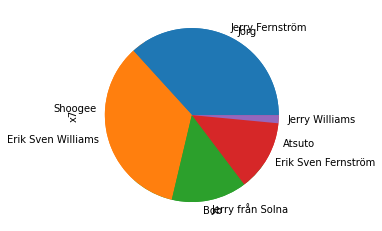

In [72]:
label_encoder = LabelEncoder()
X = roughly_cleaned_data.drop('y', axis=1)
roughly_cleaned_data.y.value_counts().plot(kind="pie")
roughly_cleaned_data.x7.value_counts().plot(kind="pie")
Y = roughly_cleaned_data["y"]